<a href="https://colab.research.google.com/github/amr552/Deep-Learning/blob/main/Recognition%20of%20plant%20disease%20with%20pre-trained%20cnn%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Xception


Mounted at /content/drive
Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
83683744/83683744 [==============================] - 3s 0us/step


Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 0.1879 - accuracy: 0.9372 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 589s 14s/step - loss: 0.1879 - accuracy: 0.9372 - val_loss: 31.9351 - val_accuracy: 0.4375
Epoch 2/10
41/41 [==============================] - 110s 3s/step - loss: 0.1028 - accuracy: 0.9752 - val_loss: 1.8411 - val_accuracy: 0.6875
Epoch 3/10
41/41 [==============================] - 98s 2s/step - loss: 0.1104 - accuracy: 0.9744 - val_loss: 1.1653 - val_accuracy: 0.5938
Epoch 4/10
41/41 [==============================] - 99s 2s/step - loss: 0.0442 - accuracy: 0.9837 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 96s 2s/step - loss: 0.0604 - accuracy: 0.9837 - val_loss: 0.8878 - val_accuracy: 0.8438
Epoch 6/10
41/41 [==============================] - 100s 2s/step - loss: 0.0817 - accuracy: 0.9791 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 101s 2s/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 2.3767e-05 - val_accuracy: 1.0000
Epoch 8/10
41/41 [===

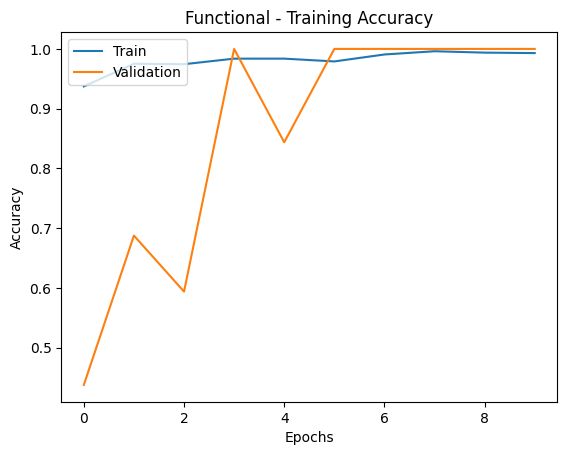

5/5 [==============================] - 65s 16s/step - loss: 0.2472 - accuracy: 0.9533
Test Accuracy: 0.9533
5/5 [==============================] - 10s 2s/step


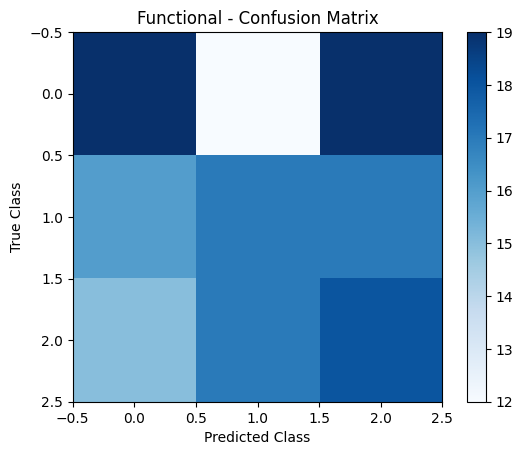

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set the paths to your training and test datasets

train_dir = "/content/drive/MyDrive/datasets/plant_disease/Train/Train"
test_dir = "/content/drive/MyDrive/datasets/plant_disease/Test/Test"
val_dir = "/content/drive/MyDrive/datasets/plant_disease/Validation/Validation"
# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and test sets with data augmentation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

model =    Xception(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))


base_model = model
model_name = base_model.__class__.__name__

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(3, activation="softmax"))

    # Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model checkpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_modelxception.h5', save_best_only=True, monitor='val_loss', mode='min')


model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

# Generate training accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(f"{model_name} - Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

#test step
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Generate confusion matrix
test_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title(f"{model_name} - Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



In [ ]:
    # Make predictions on test data
    y_pred = model.predict_generator(test_generator)
    y_pred = np.argmax(y_pred, axis=1)  # Convert categorical predictions to class labels

    # Get ground truth labels from your test data generator
    y_true = test_generator.classes

    # Calculate evaluation metrics
    print(classification_report(y_true, y_pred))

    # Calculate evaluation metrics
    #report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indicesSorry, but the response provided is too long for a single Colab cell.
    #Colab has a limitation on the cell length, and the code provided exceeds that limit.
    # However, I can provide you with a truncated version of the code that includes the necessary modifications to apply data augmentation and compare the performance of pretrained models. Here's the truncated version:


    # Calculate evaluation metrics
    report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
    print(report)

<ipython-input-2-8f366296ef85>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.38      0.38      0.38        50
           1       0.33      0.30      0.31        50
           2       0.28      0.30      0.29        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150

              precision    recall  f1-score   support

     Healthy       0.38      0.38      0.38        50
     Powdery       0.37      0.34      0.35        50
        Rust       0.33      0.36      0.35        50

    accuracy                           0.36       150
   macro avg       0.36      0.36      0.36       150
weighted avg       0.36      0.36      0.36       150



##other pretrained keras models

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
83683744/83683744 [==============================] - 4s 0us/step


best_model1.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 7.3009 - accuracy: 0.3132 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 1055s 25s/step - loss: 7.3009 - accuracy: 0.3132 - val_loss: 1.1017 - val_accuracy: 0.1875
Epoch 2/10
41/41 [==============================] - 88s 2s/step - loss: 1.0998 - accuracy: 0.3395 - val_loss: 1.0972 - val_accuracy: 0.3750
Epoch 3/10
41/41 [==============================] - 85s 2s/step - loss: 1.0984 - accuracy: 0.3457 - val_loss: 1.1002 - val_accuracy: 0.2812
Epoch 4/10
41/41 [==============================] - 85s 2s/step - loss: 1.0985 - accuracy: 0.3434 - val_loss: 1.1012 - val_accuracy: 0.2500
Epoch 5/10
41/41 [==============================] - 86s 2s/step - loss: 1.0984 - accuracy: 0.3473 - val_loss: 1.0984 - val_accuracy: 0.3438


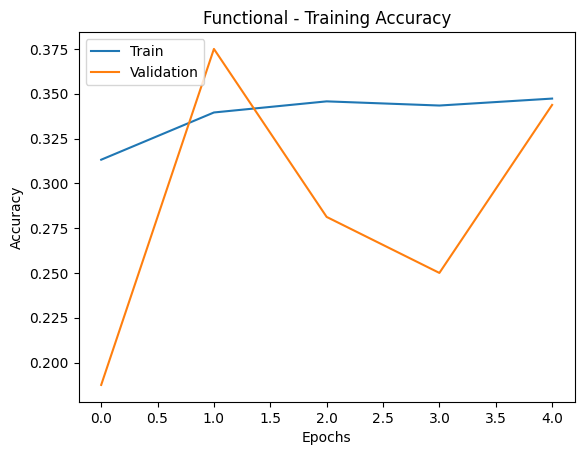

5/5 [==============================] - 111s 27s/step - loss: 1.0987 - accuracy: 0.3333
Test Accuracy: 0.3333
5/5 [==============================] - 8s 2s/step


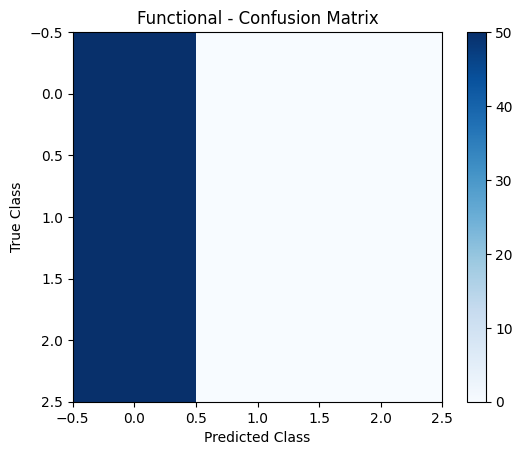

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

best_model2.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 7.0004 - accuracy: 0.3186

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 91s 2s/step - loss: 7.0004 - accuracy: 0.3186 - val_loss: 1.0972 - val_accuracy: 0.3438
Epoch 2/10
41/41 [==============================] - 86s 2s/step - loss: 1.1014 - accuracy: 0.3465 - val_loss: 1.1143 - val_accuracy: 0.3125
Epoch 3/10
41/41 [==============================] - 85s 2s/step - loss: 1.0992 - accuracy: 0.3372 - val_loss: 1.1005 - val_accuracy: 0.2812
Epoch 4/10
41/41 [==============================] - 84s 2s/step - loss: 1.0999 - accuracy: 0.3403 - val_loss: 1.0979 - val_accuracy: 0.3750
Epoch 5/10
41/41 [==============================] - 85s 2s/step - loss: 1.1001 - accuracy: 0.3233 - val_loss: 1.0982 - val_accuracy: 0.3750
Epoch 6/10
41/41 [==============================] - 86s 2s/step - loss: 1.0985 - accuracy: 0.3519 - val_loss: 1.0954 - val_accuracy: 0.4062
Epoch 7/10
41/41 [==============================] - 86s 2s/step - loss: 1.0987 - accuracy: 0.3465 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 8/10
41/41 [=============

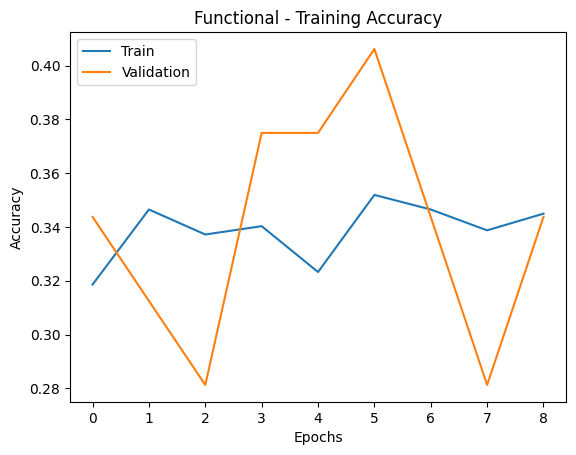

5/5 [==============================] - 9s 2s/step - loss: 1.0986 - accuracy: 0.3333
Test Accuracy: 0.3333
5/5 [==============================] - 8s 2s/step


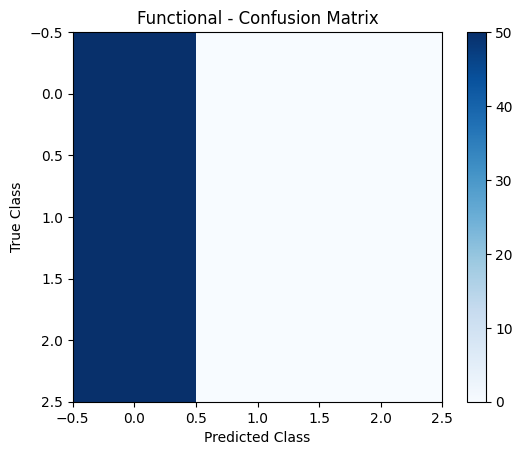

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150



best_model3.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 0.3593 - accuracy: 0.8946

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 120s 2s/step - loss: 0.3593 - accuracy: 0.8946 - val_loss: 289250.0625 - val_accuracy: 0.3438
Epoch 2/10
41/41 [==============================] - 84s 2s/step - loss: 0.4047 - accuracy: 0.9287 - val_loss: 242.1013 - val_accuracy: 0.2188
Epoch 3/10
41/41 [==============================] - 91s 2s/step - loss: 0.1776 - accuracy: 0.9589 - val_loss: 4.3929 - val_accuracy: 0.2812
Epoch 4/10
41/41 [==============================] - 89s 2s/step - loss: 0.1206 - accuracy: 0.9729 - val_loss: 1.2446 - val_accuracy: 0.2188


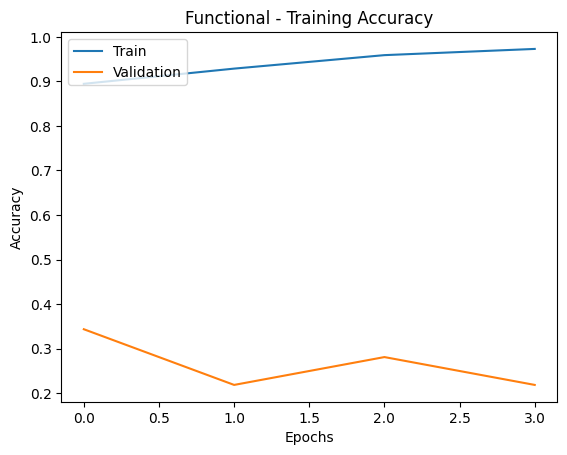

5/5 [==============================] - 10s 2s/step - loss: 1.1550 - accuracy: 0.3333
Test Accuracy: 0.3333
5/5 [==============================] - 10s 2s/step


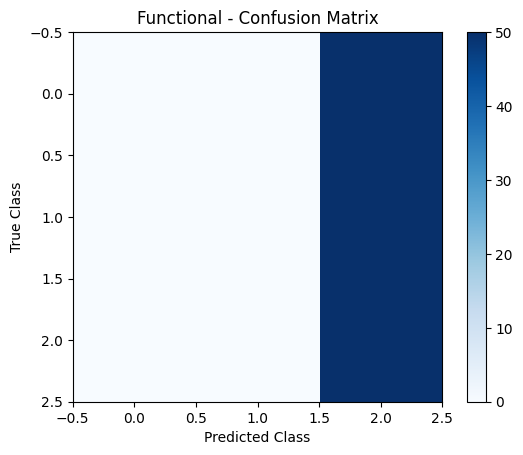

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.33      1.00      0.50        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150



best_model4.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 1.0278 - accuracy: 0.7736

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 183s 2s/step - loss: 1.0278 - accuracy: 0.7736 - val_loss: 1023893815087333376.0000 - val_accuracy: 0.3750
Epoch 2/10
41/41 [==============================] - 87s 2s/step - loss: 0.7432 - accuracy: 0.7860 - val_loss: 341090631680.0000 - val_accuracy: 0.3438
Epoch 3/10
41/41 [==============================] - 85s 2s/step - loss: 0.2759 - accuracy: 0.9132 - val_loss: 1.0931 - val_accuracy: 0.3750
Epoch 4/10
41/41 [==============================] - 93s 2s/step - loss: 0.1960 - accuracy: 0.9380 - val_loss: 1.2564 - val_accuracy: 0.3750


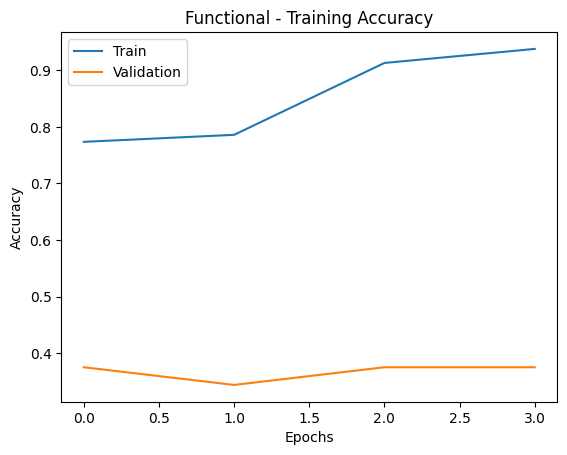

5/5 [==============================] - 9s 2s/step - loss: 1.2959 - accuracy: 0.3333
Test Accuracy: 0.3333
5/5 [==============================] - 12s 2s/step


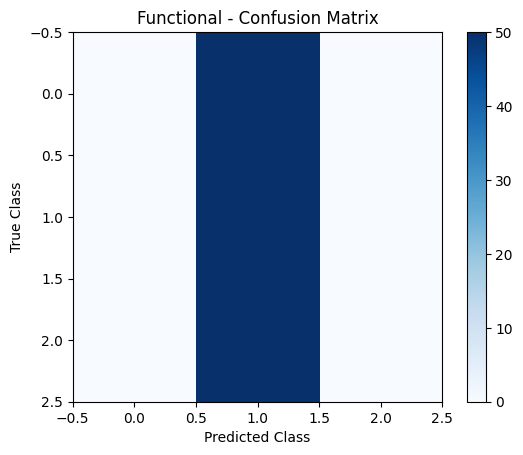

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        50
     Powdery       0.33      1.00      0.50        50
        Rust       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150



best_model5.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 0.2279 - accuracy: 0.9233

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 148s 2s/step - loss: 0.2279 - accuracy: 0.9233 - val_loss: 62.1007 - val_accuracy: 0.3750
Epoch 2/10
41/41 [==============================] - 99s 2s/step - loss: 0.0820 - accuracy: 0.9698 - val_loss: 4.7248 - val_accuracy: 0.6250
Epoch 3/10
41/41 [==============================] - 87s 2s/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.2721 - val_accuracy: 0.9375
Epoch 4/10
41/41 [==============================] - 90s 2s/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.1881 - val_accuracy: 0.9375
Epoch 5/10
41/41 [==============================] - 84s 2s/step - loss: 0.0499 - accuracy: 0.9822 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 85s 2s/step - loss: 0.0568 - accuracy: 0.9798 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 84s 2s/step - loss: 0.0840 - accuracy: 0.9752 - val_loss: 2.4090 - val_accuracy: 0.8125
Epoch 8/10
41/41 [===========

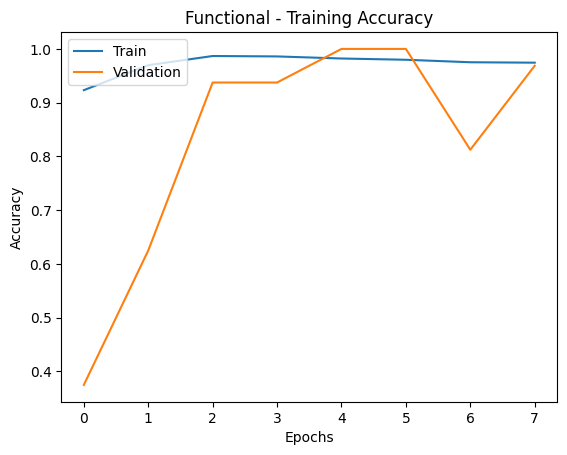

5/5 [==============================] - 12s 2s/step - loss: 0.6661 - accuracy: 0.9267
Test Accuracy: 0.9267
5/5 [==============================] - 10s 2s/step


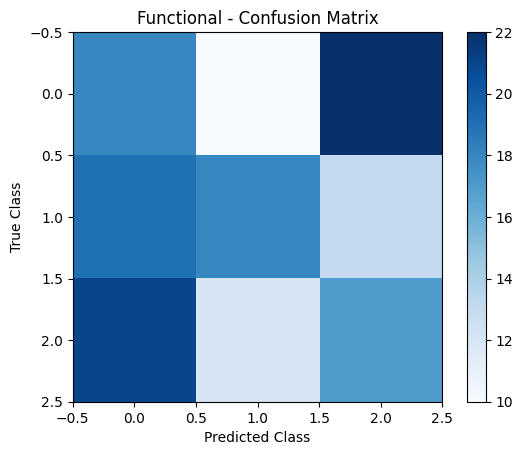

              precision    recall  f1-score   support

     Healthy       0.31      0.36      0.33        50
     Powdery       0.45      0.36      0.40        50
        Rust       0.33      0.34      0.33        50

    accuracy                           0.35       150
   macro avg       0.36      0.35      0.36       150
weighted avg       0.36      0.35      0.36       150



best_model6.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 0.2537 - accuracy: 0.9171

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 187s 2s/step - loss: 0.2537 - accuracy: 0.9171 - val_loss: 104.7227 - val_accuracy: 0.4062
Epoch 2/10
41/41 [==============================] - 91s 2s/step - loss: 0.1060 - accuracy: 0.9703 - val_loss: 14.8896 - val_accuracy: 0.3125
Epoch 3/10
41/41 [==============================] - 87s 2s/step - loss: 0.0970 - accuracy: 0.9744 - val_loss: 0.1568 - val_accuracy: 0.9062
Epoch 4/10
41/41 [==============================] - 88s 2s/step - loss: 0.0597 - accuracy: 0.9829 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 85s 2s/step - loss: 0.0346 - accuracy: 0.9899 - val_loss: 0.1309 - val_accuracy: 0.9688
Epoch 6/10
41/41 [==============================] - 87s 2s/step - loss: 0.0452 - accuracy: 0.9845 - val_loss: 0.1187 - val_accuracy: 0.9375
Epoch 7/10
41/41 [==============================] - 85s 2s/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.2156 - val_accuracy: 0.9688


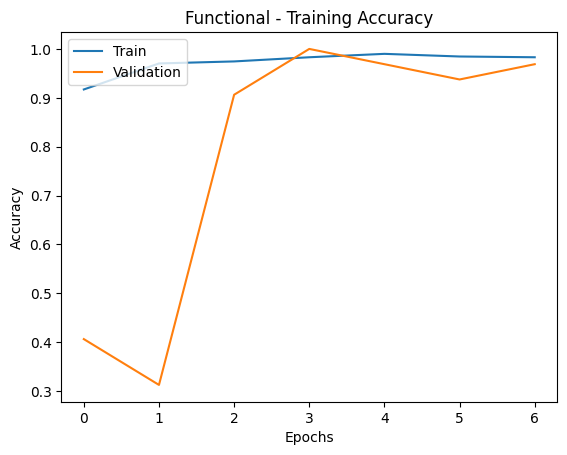

5/5 [==============================] - 12s 2s/step - loss: 0.2234 - accuracy: 0.9467
Test Accuracy: 0.9467
5/5 [==============================] - 11s 2s/step


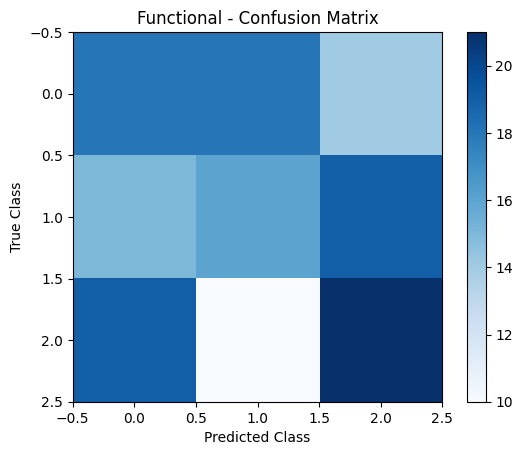

              precision    recall  f1-score   support

     Healthy       0.35      0.36      0.35        50
     Powdery       0.36      0.32      0.34        50
        Rust       0.39      0.42      0.40        50

    accuracy                           0.37       150
   macro avg       0.37      0.37      0.37       150
weighted avg       0.37      0.37      0.37       150



best_model7.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 0.3075 - accuracy: 0.8860

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 121s 2s/step - loss: 0.3075 - accuracy: 0.8860 - val_loss: 4.9766 - val_accuracy: 0.4375
Epoch 2/10
41/41 [==============================] - 86s 2s/step - loss: 0.1437 - accuracy: 0.9527 - val_loss: 3.9056 - val_accuracy: 0.5000
Epoch 3/10
41/41 [==============================] - 83s 2s/step - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.7092 - val_accuracy: 0.8438
Epoch 4/10
41/41 [==============================] - 87s 2s/step - loss: 0.0967 - accuracy: 0.9729 - val_loss: 17.1282 - val_accuracy: 0.5625
Epoch 5/10
41/41 [==============================] - 84s 2s/step - loss: 0.0683 - accuracy: 0.9837 - val_loss: 4.0522 - val_accuracy: 0.6562
Epoch 6/10
41/41 [==============================] - 89s 2s/step - loss: 0.1412 - accuracy: 0.9636 - val_loss: 16.4537 - val_accuracy: 0.3438


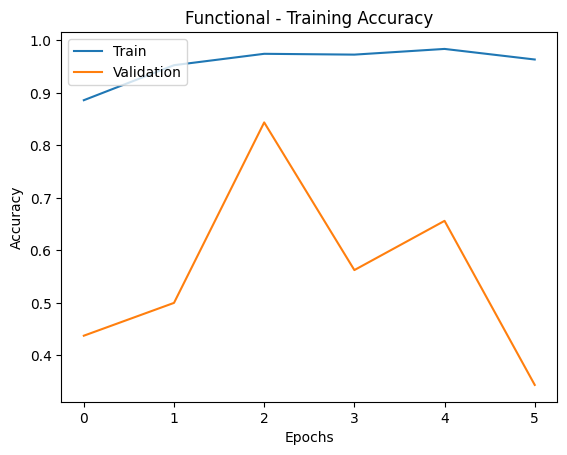

5/5 [==============================] - 11s 2s/step - loss: 15.0130 - accuracy: 0.3933
Test Accuracy: 0.3933
5/5 [==============================] - 10s 2s/step


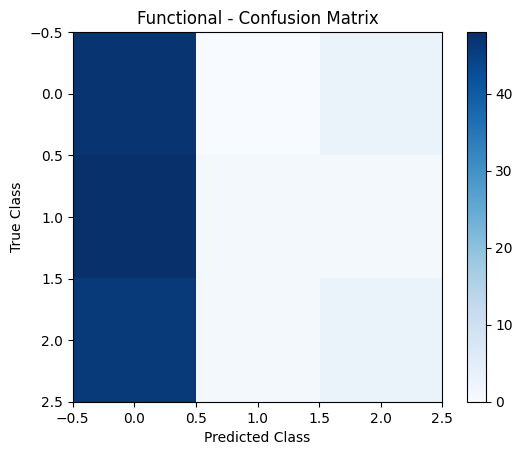

              precision    recall  f1-score   support

     Healthy       0.33      0.94      0.49        50
     Powdery       0.50      0.02      0.04        50
        Rust       0.43      0.06      0.11        50

    accuracy                           0.34       150
   macro avg       0.42      0.34      0.21       150
weighted avg       0.42      0.34      0.21       150



best_model8.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 0.2674 - accuracy: 0.9302

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 95s 2s/step - loss: 0.2674 - accuracy: 0.9302 - val_loss: 2.5960 - val_accuracy: 0.8438
Epoch 2/10
41/41 [==============================] - 88s 2s/step - loss: 0.1570 - accuracy: 0.9636 - val_loss: 5.6855 - val_accuracy: 0.5938
Epoch 3/10
41/41 [==============================] - 89s 2s/step - loss: 0.0953 - accuracy: 0.9791 - val_loss: 0.1430 - val_accuracy: 0.9062
Epoch 4/10
41/41 [==============================] - 86s 2s/step - loss: 0.0627 - accuracy: 0.9840 - val_loss: 0.3602 - val_accuracy: 0.9062
Epoch 5/10
41/41 [==============================] - 90s 2s/step - loss: 0.0516 - accuracy: 0.9822 - val_loss: 0.2278 - val_accuracy: 0.9688
Epoch 6/10
41/41 [==============================] - 82s 2s/step - loss: 0.1351 - accuracy: 0.9643 - val_loss: 1.5102 - val_accuracy: 0.8750
Epoch 7/10
41/41 [==============================] - 88s 2s/step - loss: 0.0567 - accuracy: 0.9845 - val_loss: 8.7129e-05 - val_accuracy: 1.0000
Epoch 8/10
41/41 [=========

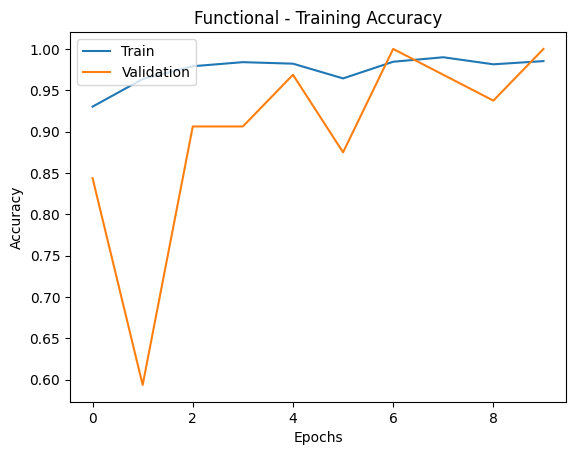

5/5 [==============================] - 10s 2s/step - loss: 0.3931 - accuracy: 0.9600
Test Accuracy: 0.9600
5/5 [==============================] - 9s 2s/step


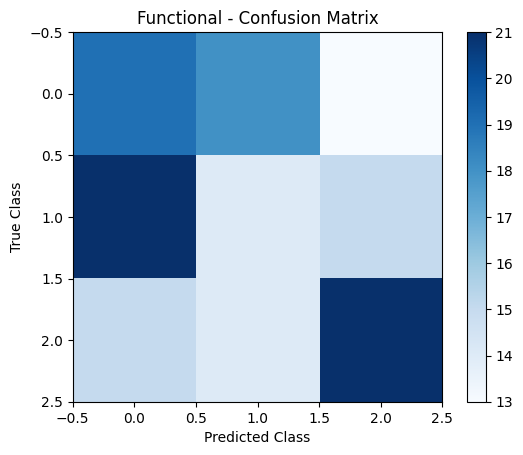

              precision    recall  f1-score   support

     Healthy       0.35      0.38      0.36        50
     Powdery       0.30      0.28      0.29        50
        Rust       0.43      0.42      0.42        50

    accuracy                           0.36       150
   macro avg       0.36      0.36      0.36       150
weighted avg       0.36      0.36      0.36       150



best_model9.h5
Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 0.2002 - accuracy: 0.9287

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 115s 2s/step - loss: 0.2002 - accuracy: 0.9287 - val_loss: 0.2015 - val_accuracy: 0.9375
Epoch 2/10
41/41 [==============================] - 89s 2s/step - loss: 0.0646 - accuracy: 0.9822 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 87s 2s/step - loss: 0.0781 - accuracy: 0.9744 - val_loss: 0.0292 - val_accuracy: 0.9688
Epoch 4/10
41/41 [==============================] - 88s 2s/step - loss: 0.0890 - accuracy: 0.9698 - val_loss: 1.0364 - val_accuracy: 0.9062
Epoch 5/10
41/41 [==============================] - 85s 2s/step - loss: 0.0318 - accuracy: 0.9868 - val_loss: 0.1169 - val_accuracy: 0.9688


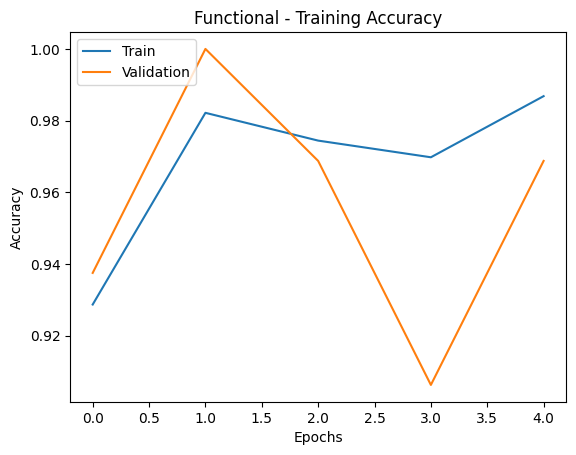

5/5 [==============================] - 11s 2s/step - loss: 0.1624 - accuracy: 0.9733
Test Accuracy: 0.9733
5/5 [==============================] - 9s 2s/step


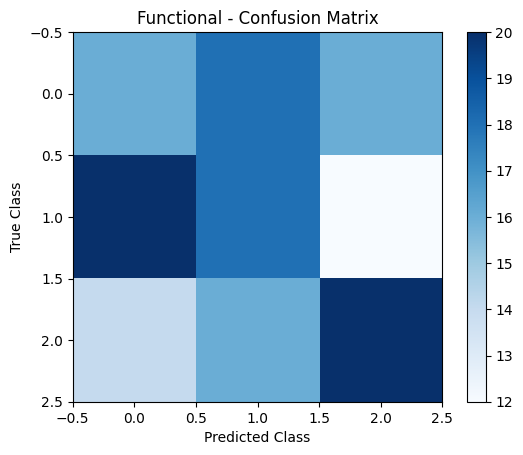

              precision    recall  f1-score   support

     Healthy       0.32      0.32      0.32        50
     Powdery       0.35      0.36      0.35        50
        Rust       0.42      0.40      0.41        50

    accuracy                           0.36       150
   macro avg       0.36      0.36      0.36       150
weighted avg       0.36      0.36      0.36       150



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import (
    VGG16,
    VGG19,
    ResNet50,
    ResNet152,
    DenseNet121,
    DenseNet201,
    InceptionV3,
    MobileNet,
    Xception
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set the paths to your training and test datasets

train_dir = "/content/drive/MyDrive/datasets/plant_disease/Train/Train"
test_dir = "/content/drive/MyDrive/datasets/plant_disease/Test/Test"
val_dir = "/content/drive/MyDrive/datasets/plant_disease/Validation/Validation"
# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and test sets with data augmentation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

# Define the pretrained models
models = [
    VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    VGG19(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    ResNet50(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    ResNet152(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    DenseNet121(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    DenseNet201(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    InceptionV3(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    MobileNet(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    Xception(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
]
number=0
# Train and evaluate each model
for model in models:
    base_model = model
    model_name = base_model.__class__.__name__

    model = tf.keras.models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(3, activation="softmax"))
        # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

    number+=1
    # Model checkpoint to save the best model based on validation loss
    #model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    model_checkpoint = ModelCheckpoint(f'best_model{number}.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    print(f'best_model{number}.h5')

    model.compile(
        loss="categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(lr=0.001),
        metrics=["accuracy"],
    )

    # Train the model with data augmentation
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n // batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.n // batch_size,
        callbacks=[early_stopping, model_checkpoint]
    )

    # Generate training accuracy graph
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title(f"{model_name} - Training Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()

    #test step
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Generate confusion matrix
    test_labels = test_generator.classes
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    cm = confusion_matrix(test_labels, predicted_labels)
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()


    # Calculate evaluation metrics
    #report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indicesSorry, but the response provided is too long for a single Colab cell.
    #Colab has a limitation on the cell length, and the code provided exceeds that limit.
    # However, I can provide you with a truncated version of the code that includes the necessary modifications to apply data augmentation and compare the performance of pretrained models. Here's the truncated version:


    # Calculate evaluation metrics
    report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
    print(report)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
train_dir = "/content/drive/MyDrive/datasets/plant_disease/Train/Train"
test_dir = "/content/drive/MyDrive/datasets/plant_disease/Test/Test"
val_dir = "/content/drive/MyDrive/datasets/plant_disease/Validation/Validation"
# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and test sets with data augmentation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


##Alexnet and Googlenet pretrained model


In [ ]:
num_classes=3
# GoogLeNet model architecture
def create_googlenet(num_classes):
    inputs = tf.keras.Input(shape=(img_width, img_height, 3))
    base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_tensor=inputs)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
    return model

# Create the GoogLeNet model
googlenet_model = create_googlenet(num_classes)

# Compile the model
googlenet_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = googlenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)
# Generate training accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(f"{googlenet_model} - Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()
# Evaluate the models on the test set
googlenet_scores = googlenet_model.evaluate(test_generator)

print("GoogLeNet Test Accuracy:", googlenet_scores[1])
# Generate confusion matrix
test_labels = test_generator.classes
predictions = googlenet_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title(f"{googlenet_model} - Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Calculate evaluation metrics
report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
print(report)
save_model(model, 'saved_modelgooglenet.h5')  # Replace 'saved_model.h5' with your desired filename
print('saved_modelgooglenet.h5')

Epoch 1/10
41/41 [==============================] - 136s 3s/step - loss: 0.5381 - accuracy: 0.8147 - val_loss: 8.9411 - val_accuracy: 0.4375
Epoch 2/10
41/41 [==============================] - 114s 3s/step - loss: 0.1934 - accuracy: 0.9488 - val_loss: 2.2518 - val_accuracy: 0.4688
Epoch 3/10
41/41 [==============================] - 119s 3s/step - loss: 0.1596 - accuracy: 0.9512 - val_loss: 13.0270 - val_accuracy: 0.3125
Epoch 4/10
41/41 [==============================] - 119s 3s/step - loss: 0.1496 - accuracy: 0.9535 - val_loss: 4.3279 - val_accuracy: 0.9062
Epoch 5/10
41/41 [==============================] - 117s 3s/step - loss: 0.0754 - accuracy: 0.9791 - val_loss: 0.3872 - val_accuracy: 0.9688
Epoch 6/10
34/41 [=======================>......] - ETA: 19s - loss: 0.1550 - accuracy: 0.9632

In [ ]:
4num_classes=3
# AlexNet model architecture
def create_alexnet(num_classes):
    inputs = tf.keras.Input(shape=(img_width, img_height, 3))
    x = tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(256, (5, 5), padding="same", activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(384, (3, 3), padding="same", activation='relu')(x)
    x = tf.keras.layers.Conv2D(384, (3, 3), padding="same", activation='relu')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    return model



# Create the AlexNet model
alexnet_model = create_alexnet(num_classes)

# Compile the model
alexnet_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = alexnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)
# Generate training accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(f"{alexnet_model} - Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

alexnet_scores = alexnet_model.evaluate(test_generator)
print("AlexNet Test Accuracy:", alexnet_scores[1])
# Generate confusion matrix
test_labels = test_generator.classes
predictions = alexnet_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title(f"{alexnet_model} - Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Calculate evaluation metrics
report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
print(report)
save_model(model, 'saved_modelalexnet.h5')  # Replace 'saved_model.h5' with your desired filename
print('saved_modelalexnet.h5')

##other


In [ ]:

#python
import tensorflow as tf
import tensorflow.keras.applications as applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Set the paths to your training and test datasets
train_dir = "/content/drive/MyDrive/datasets/plant_disease/Train/Train"
test_dir = "/content/drive/MyDrive/datasets/plant_disease/Test/Test"

# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create data generators for training and test sets with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

# Define the pretrained models
pretrained_models = [
    applications.VGG16,
    applications.VGG19,
    applications.ResNet50,
    applications.ResNet152,
    applications.DenseNet121,
    applications.DenseNet201,
    applications.InceptionV3,
    applications.MobileNet,
    applications.Xception,
    applications.EfficientNetB0,
    applications.EfficientNetB1,
]


# Train and evaluate each model
for model in pretrained_models:
    model_name = model.__name__

    base_model = model(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

    model = tf.keras.models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(3, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(lr=0.001),
        metrics=["accuracy"],
    )

    # Train the model with data augmentation
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n // batch_size,
        epochs=10,
        validation_data=test_generator,
        validation_steps=test_generator.n // batch_size,

    )

    # Generate training accuracy graph
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title(f"{model_name} - Training Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()



    # Generate confusion matrix
    test_labels = test_generator.classes
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    cm = confusion_matrix(test_labels, predicted_labels)
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

